**Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('breast_cancer.csv')

In [3]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
113,864292,B,10.510,20.19,68.64,334.2,0.11220,0.13030,0.064760,0.030680,...,11.16,22.75,72.62,374.4,0.13000,0.20490,0.12950,0.06136,0.2383,0.09026
405,904971,B,10.940,18.59,70.39,370.0,0.10040,0.07460,0.049440,0.029320,...,12.40,25.58,82.76,472.4,0.13630,0.16440,0.14120,0.07887,0.2251,0.07732
321,894618,M,20.160,19.66,131.10,1274.0,0.08020,0.08564,0.115500,0.077260,...,23.06,23.03,150.20,1657.0,0.10540,0.15370,0.26060,0.14250,0.3055,0.05933
445,9110720,B,11.990,24.89,77.61,441.3,0.10300,0.09218,0.054410,0.042740,...,12.98,30.36,84.48,513.9,0.13110,0.18220,0.16090,0.12020,0.2599,0.08251
363,9010872,B,16.500,18.29,106.60,838.1,0.09686,0.08468,0.058620,0.048350,...,18.13,25.45,117.20,1009.0,0.13380,0.16790,0.16630,0.09123,0.2394,0.06469
30,853401,M,18.630,25.11,124.80,1088.0,0.10640,0.18870,0.231900,0.124400,...,23.15,34.01,160.50,1670.0,0.14910,0.42570,0.61330,0.18480,0.3444,0.09782
459,9112712,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.015410,0.010430,...,10.67,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211
472,911384,B,14.920,14.93,96.45,686.9,0.08098,0.08549,0.055390,0.032210,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
308,893526,B,13.500,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,...,14.97,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192
183,873843,B,11.410,14.92,73.53,402.0,0.09059,0.08155,0.061810,0.023610,...,12.37,17.70,79.12,467.2,0.11210,0.16100,0.16480,0.06296,0.1811,0.07427


In [4]:
# replace 'M' with one
df['diagnosis'] = df['diagnosis'].replace('M', 1)
# replace 'B' with zero
df['diagnosis'] = df['diagnosis'].replace('B', 0)


**Diagnosis (M = malignant, B = benign)**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**No null values found.**

In [7]:
df.duplicated().sum()

0

**No duplicated values found.**



**The first step is to see if the dataset is unbalanced. This is very important when dealing with a binary classification like this one.**

In [8]:
target = 'diagnosis'
X = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]

In [9]:
X.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

0    357
1    212
Name: diagnosis, dtype: int64


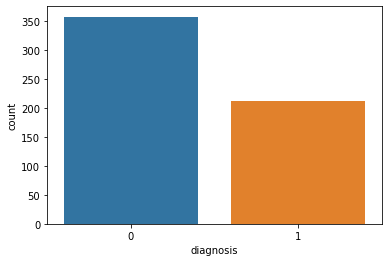

In [10]:
ax = sns.countplot(x=target,data=df)
print(df[target].value_counts())

**The skewness of the data is not very significant, I will also solve the problem by applying oversampling methods.**

In [11]:
X = X.drop(['id'], axis=1)


**Let us look at the correlations of the variables. To see which ones we can discard and which ones we cannot**

In [12]:
# check correlation
df_num = df.drop('diagnosis', axis=1)
corr = df_num.corr()

<AxesSubplot:>

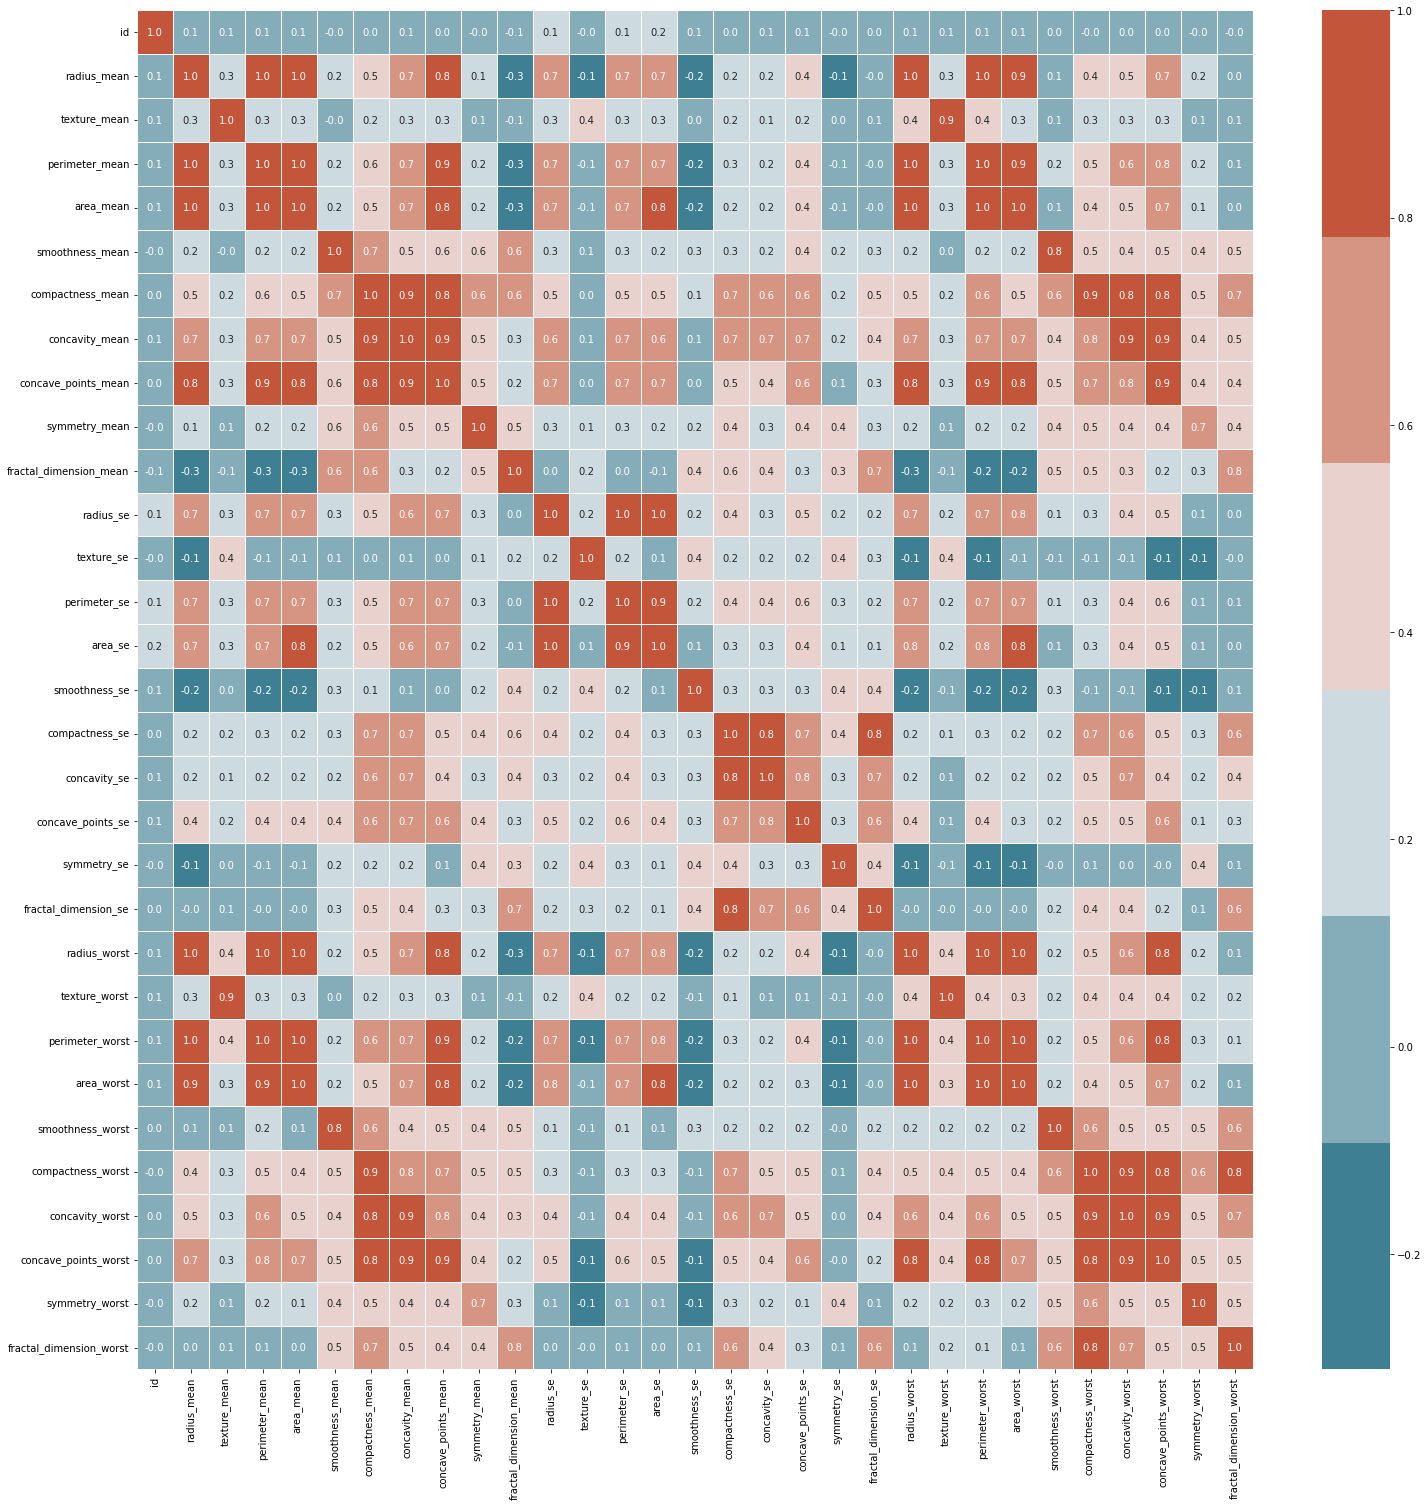

In [13]:
#correlation map
f,ax = plt.subplots(figsize=(25, 25))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(220, 20)
#Plotting
sns.heatmap(df_num.corr(), annot=True, linewidths=.5, fmt= '.1f', cmap=cmap)

**As can be seen in the above matrix, there are variables that are not very closely related. That is why we can delete them.**

In [14]:
drop_cols =  ['radius_mean','compactness_mean','concave_points_mean','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave_points_worst','compactness_se','concave_points_se','texture_worst','area_worst']
X = X.drop(drop_cols, axis = 1)

In [15]:
X

,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,122.80,1001.0,0.11840,0.30010,0.2419,0.07871,1.0950,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.16220,0.7119,0.4601,0.11890
1,17.77,132.90,1326.0,0.08474,0.08690,0.1812,0.05667,0.5435,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.12380,0.2416,0.2750,0.08902
2,21.25,130.00,1203.0,0.10960,0.19740,0.2069,0.05999,0.7456,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.14440,0.4504,0.3613,0.08758
3,20.38,77.58,386.1,0.14250,0.24140,0.2597,0.09744,0.4956,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.20980,0.6869,0.6638,0.17300
4,14.34,135.10,1297.0,0.10030,0.19800,0.1809,0.05883,0.7572,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,142.00,1479.0,0.11100,0.24390,0.1726,0.05623,1.1760,1.2560,158.70,0.010300,0.05198,0.01114,0.004239,0.14100,0.4107,0.2060,0.07115
565,28.25,131.20,1261.0,0.09780,0.14400,0.1752,0.05533,0.7655,2.4630,99.04,0.005769,0.03950,0.01898,0.002498,0.11660,0.3215,0.2572,0.06637
566,28.08,108.30,858.1,0.08455,0.09251,0.1590,0.05648,0.4564,1.0750,48.55,0.005903,0.04730,0.01318,0.003892,0.11390,0.3403,0.2218,0.07820
567,29.33,140.10,1265.0,0.11780,0.35140,0.2397,0.07016,0.7260,1.5950,86.22,0.006522,0.07117,0.02324,0.006185,0.16500,0.9387,0.4087,0.12400


# Data Preprocessing

In [16]:
# applying Standard Scaler
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col= X.columns
X[col] = st.fit_transform(X[col])
X[col].head()

,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,1.269934,0.984375,1.568466,2.652874,2.217515,2.255747,2.489734,-0.565265,2.487578,-0.214002,0.724026,1.148757,0.907083,1.307686,2.109526,2.750622,1.937015
1,-0.353632,1.685955,1.908708,-0.826962,-0.023846,0.001392,-0.868652,0.499255,-0.876244,0.742402,-0.605351,-0.440780,-0.805450,-0.099444,-0.375612,-0.146749,-0.243890,0.281190
2,0.456187,1.566503,1.558884,0.942210,1.363478,0.939685,-0.398008,1.228676,-0.780083,1.181336,-0.297005,0.213076,0.237036,0.293559,0.527407,0.854974,1.152255,0.201391
3,0.253732,-0.592687,-0.764464,3.283553,1.915897,2.867383,4.910919,0.326373,-0.110409,-0.288378,0.689702,0.819518,4.732680,2.047511,3.394275,1.989588,6.046041,4.935010
4,-1.151816,1.776573,1.826229,0.280372,1.371011,-0.009560,-0.562450,1.270543,-0.790244,1.190357,1.483067,0.828471,-0.361092,0.499328,0.220556,0.613179,-0.868353,-0.397100


In [17]:
# train test split

#applying train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [18]:
#create a function 
def create_model(model): #model is user defined which holds the object of algo
    #train the model
    model.fit(X_train,Y_train)
    #test the data
    Y_pred=model.predict(X_test)
    #Generate report
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    return model

In [19]:
#to generate confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix,classification_report

# MODEL BUILDING

**1. Logistic Regression**

In [20]:
#to apply LogisticRegression 
from sklearn.linear_model import LogisticRegression
#create an object
lr=LogisticRegression()
#call function
lr=create_model(lr)

[[71  1]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**2. Decision Tree Classifier (Gini Index)**

In [21]:
#perform DecisionTreeClassifier(gini index)
from sklearn.tree import DecisionTreeClassifier
#to create an object
dt=DecisionTreeClassifier(random_state=1) #by default gini index method
#call function
dt=create_model(dt)

[[67  5]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        72
           1       0.88      0.86      0.87        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



In [22]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,perimeter_mean,0.628933
1,concavity_worst,0.153451
2,smoothness_worst,0.063788
3,area_se,0.035413
4,symmetry_se,0.030186
5,fractal_dimension_mean,0.025972
6,symmetry_worst,0.017764
7,texture_mean,0.014608
8,texture_se,0.008007
9,smoothness_mean,0.006261


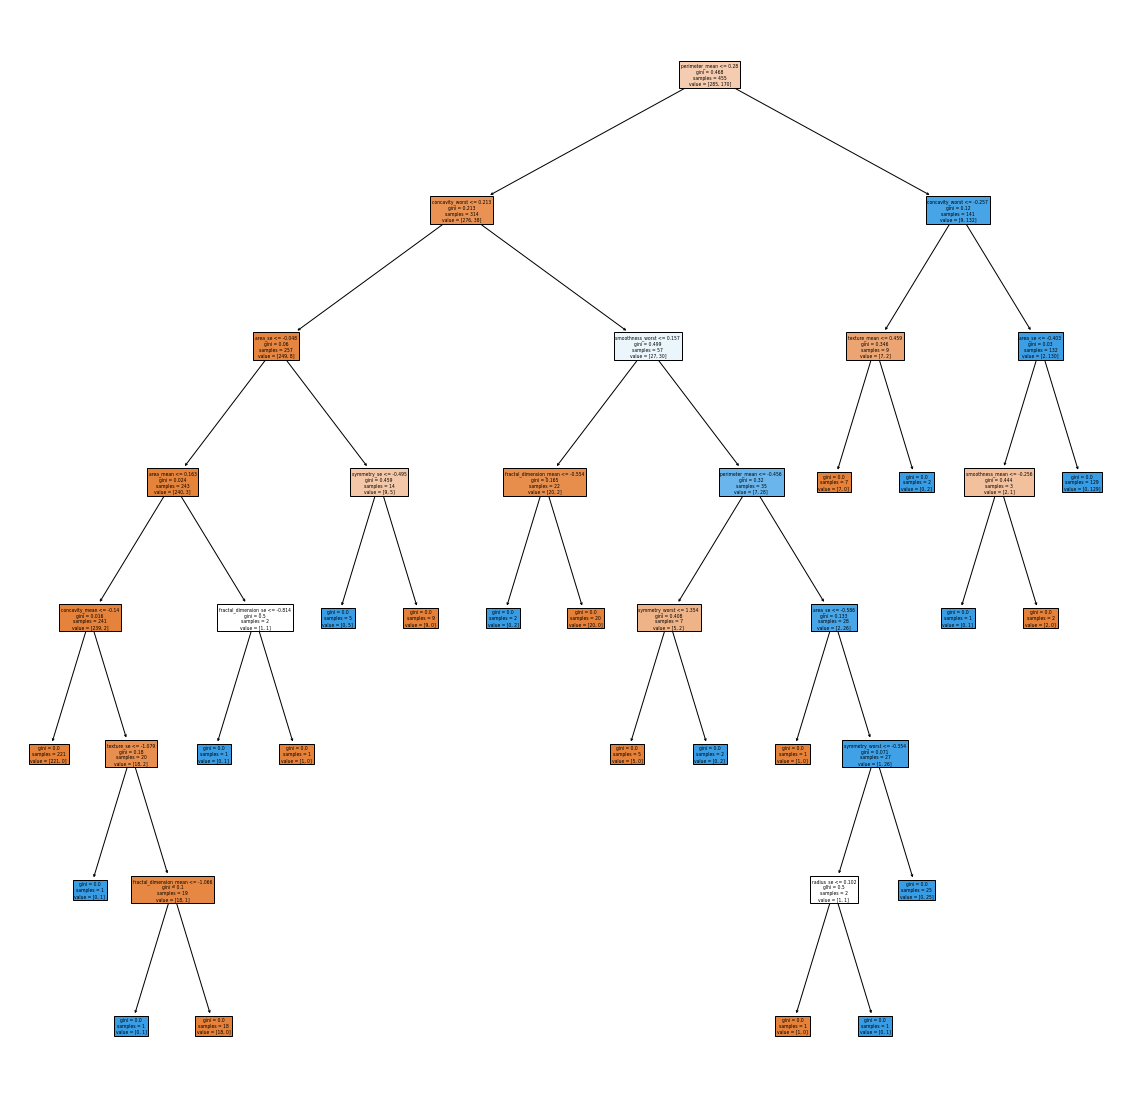

In [23]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

**3. DTC (Gini) with Pruning Techniques**

In [24]:
#to see with max_depth (pruning technique)
dt1=DecisionTreeClassifier(random_state=1,max_depth=18)
'''
for i in range(1,19):
    dt1=DecisionTreeClassifier(random_state=1, max_depth=i)
    print('Max Depth: ', i)
    
    dt1=create_model(dt1)
'''
#from the above loop we found that the best score is found at max_depth=18
#call function
dt1=create_model(dt1)

[[67  5]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        72
           1       0.88      0.86      0.87        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



In [25]:
dict={'Input':X.columns,'IG':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,perimeter_mean,0.628933
1,concavity_worst,0.153451
2,smoothness_worst,0.063788
3,area_se,0.035413
4,symmetry_se,0.030186
5,fractal_dimension_mean,0.025972
6,symmetry_worst,0.017764
7,texture_mean,0.014608
8,texture_se,0.008007
9,smoothness_mean,0.006261


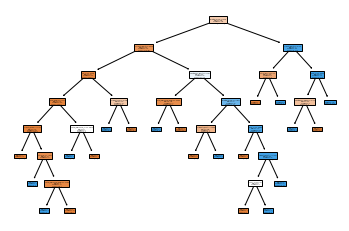

In [26]:
#create a tree
from sklearn import tree
features=X.columns
#plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [27]:
#to see with min_sample_leaf (pruning technique)
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=65)
"""
for i in range(45,101):
    dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("Min Sample Leaf: ", i)
    dt1=create_model(dt1)
"""
#from the above loop we found that the best score is found at min_samples_leaf=65
#call function
dt2=create_model(dt2)

[[72  0]
 [15 27]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        72
           1       1.00      0.64      0.78        42

    accuracy                           0.87       114
   macro avg       0.91      0.82      0.84       114
weighted avg       0.89      0.87      0.86       114



In [28]:
dict={'Input':X.columns,'IG':dt2.feature_importances_}
df3=pd.DataFrame(dict)
df3.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,perimeter_mean,0.843381
1,concavity_worst,0.147714
2,concavity_se,0.008761
3,fractal_dimension_worst,0.000143
4,symmetry_worst,0.000000
5,smoothness_worst,0.000000
6,fractal_dimension_se,0.000000
7,symmetry_se,0.000000
8,smoothness_se,0.000000
9,texture_mean,0.000000


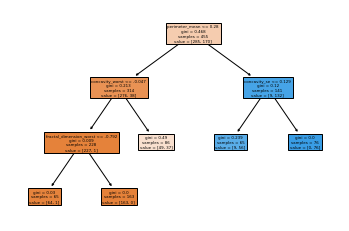

In [29]:
#create a tree
from sklearn import tree
features=X.columns
#plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

**4. DTC (Entropy) with Pruning Techniques**

In [30]:
#first create object of DecisionTreeClassifier and pass criterion='entropy' as an paramter
dt=DecisionTreeClassifier(random_state=1,criterion='entropy')
#call function
dt=create_model(dt)

[[70  2]
 [ 7 35]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [31]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,perimeter_mean,0.503407
1,concavity_worst,0.234889
2,area_se,0.054130
3,smoothness_worst,0.049054
4,area_mean,0.036807
5,radius_se,0.034499
6,texture_mean,0.033329
7,concavity_mean,0.026370
8,symmetry_se,0.012844
9,texture_se,0.008321


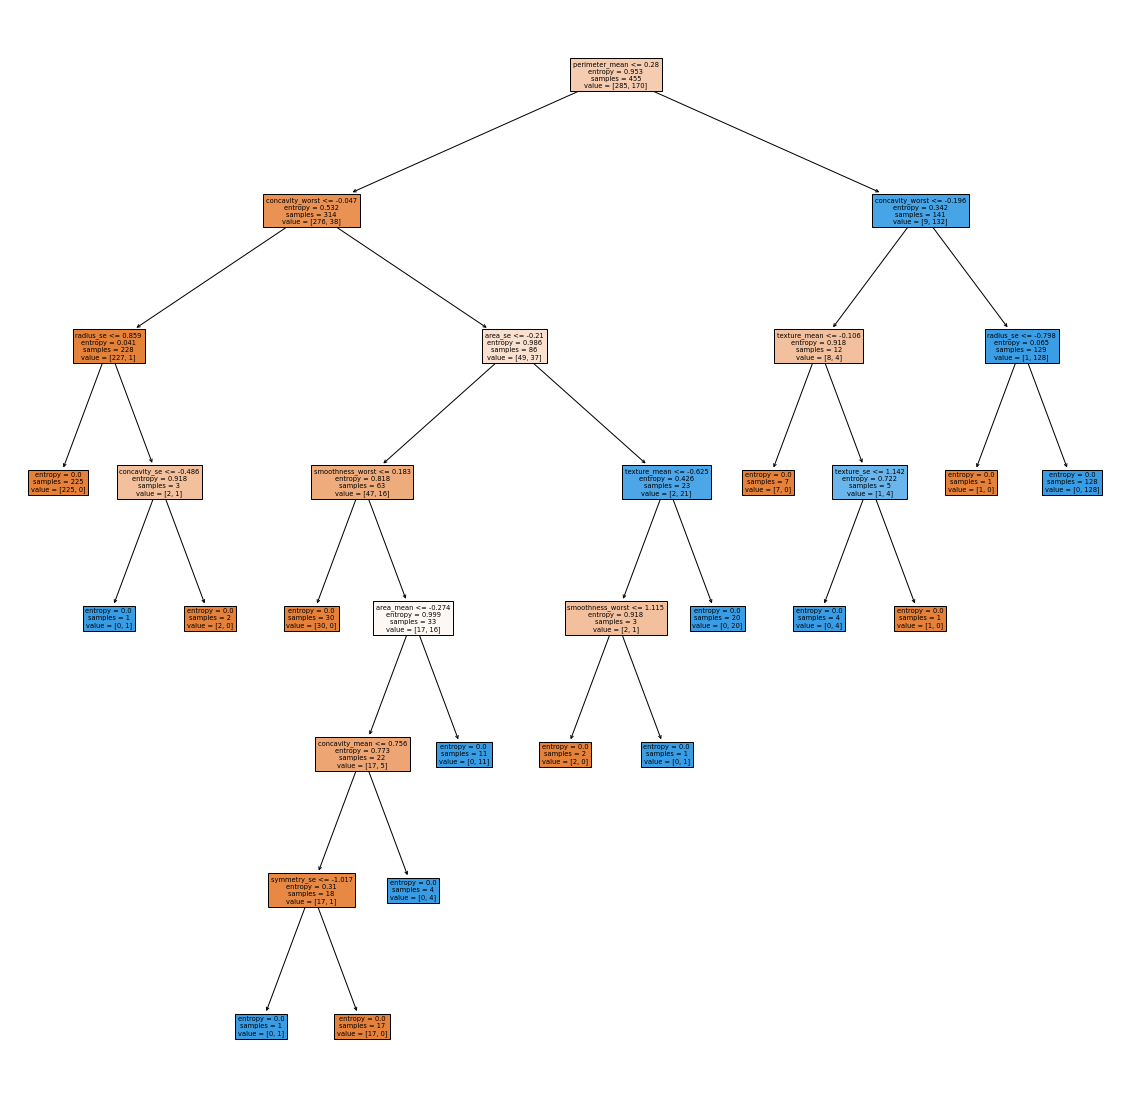

In [32]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [33]:
#applying pruning technique
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=12)
"""
for i in range(1,18):
    dt1=DecisionTreeClassifier(random_state=1,criterion='entropy', max_depth=i)
    print('Max Depth: ', i)
    
    dt1=create_model(dt1)
"""
#from the above loop we found that the best score is found at max_depth=12
#call function
dt1=create_model(dt1)

[[70  2]
 [ 7 35]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [34]:
dict={'Input':X.columns,'IG':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,perimeter_mean,0.503407
1,concavity_worst,0.234889
2,area_se,0.054130
3,smoothness_worst,0.049054
4,area_mean,0.036807
5,radius_se,0.034499
6,texture_mean,0.033329
7,concavity_mean,0.026370
8,symmetry_se,0.012844
9,texture_se,0.008321


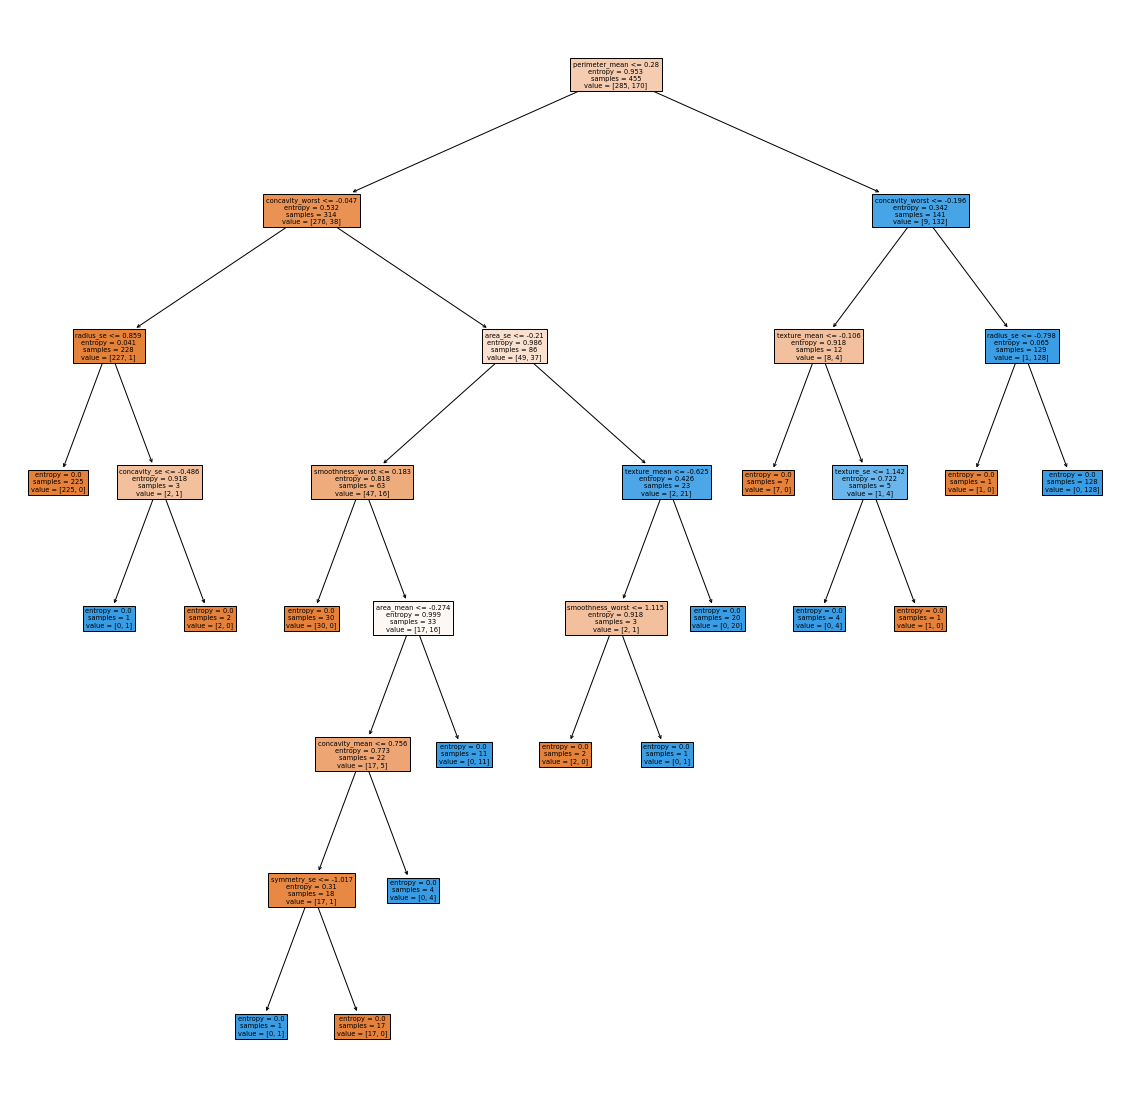

In [35]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [36]:
#apply DTC entrpy with pruning min_sample_leaf
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=25,criterion='entropy') 
"""
for i in range(45,101):
    dt2=DecisionTreeClassifier(random_state=1,criterion='entropy', min_samples_leaf=i)
    print("Min Sample Leaf: ", i)
    dt2=create_model(dt2)
"""
#from the above loop we found that the best score is found at min_samples_leaf=25
dt2=create_model(dt2)

[[69  3]
 [10 32]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        72
           1       0.91      0.76      0.83        42

    accuracy                           0.89       114
   macro avg       0.89      0.86      0.87       114
weighted avg       0.89      0.89      0.88       114



In [37]:
dict={'Input':X.columns,'IG':dt2.feature_importances_}
df3=pd.DataFrame(dict)
df3.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,perimeter_mean,0.720386
1,concavity_worst,0.270017
2,radius_se,0.009597
3,texture_mean,0.000000
4,smoothness_se,0.000000
5,symmetry_worst,0.000000
6,smoothness_worst,0.000000
7,fractal_dimension_se,0.000000
8,symmetry_se,0.000000
9,concavity_se,0.000000


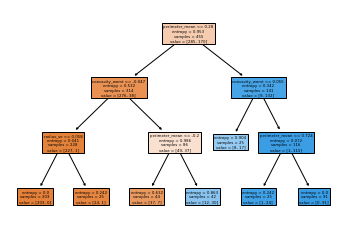

In [38]:
#create a tree
from sklearn import tree
features=X.columns
#plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

**5. Ensembling Technique: RandomForestTree**

In [39]:
#to import randomforesttree
from sklearn.ensemble import RandomForestClassifier

In [40]:
#using gini index
#create object
rfc=RandomForestClassifier(n_estimators=100,max_features=18, random_state=1) 
"""
for i in range(17,1,-1):
    rfc=RandomForestClassifier(n_estimators=10, max_features=i, random_state=1)
    print('No. of features: ', i)
    #call function
    rfc=create_model(rfc)
"""
#from the above loop we found that the best score is found at max_features=18
#call function
rfc=create_model(rfc)

[[70  2]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [41]:
#using entropy
rfc=RandomForestClassifier(n_estimators=10,max_features=17,random_state=1,criterion='entropy')
"""
for i in range(17,1,-1):
    rfc=RandomForestClassifier(n_estimators=10, max_features=i, random_state=1, criterion='entropy')
    print('No. of features: ', i)
    #call function
    rfc=create_model(rfc)
"""
#from the above loop we found that the best score is found at max_features=17
#call function
rfc=create_model(rfc)

[[71  1]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



**6. Ensembling Technique: Boosting**

**ADA Boosting**

In [42]:
#apply AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [43]:
#create object
ada=AdaBoostClassifier(n_estimators=100,random_state=1)
"""
for i in range(1,100):
    ada=AdaBoostClassifier(n_estimators=i, random_state=1)
    print('No. of decision stumps: ', i)
    ada=create_model(ada)
"""
#from the above loop we found that the best score is found at n_estimators=100
#call function
ada=create_model(ada)

[[70  2]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        72
           1       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



**Gradient Boosting**

In [44]:
#to apply GradientBoostingClassifier on this dataset 
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
#create object of GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=1,n_estimators=75) #n_estimators means no of iterations
"""
for i in range(10,101,1):
    gbc=GradientBoostingClassifier(n_estimators=i, random_state=1)
    print('No. of estimators: ', i)
    gbc=create_model(gbc)
"""
#from the above loop we found that the best score is found at n_estimators=75
#call function
gbc=create_model(gbc)

[[70  2]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        72
           1       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



**Extreme Gradient Boosting**

In [46]:
#to apply XGBClassifier 
from xgboost import XGBClassifier

In [47]:
#create a object
xgc=XGBClassifier(n_estimators=67,random_state=1, n_jobs=-1)
"""
for i in range(10,101,1):
    xgc=XGBClassifier(n_estimators=i, random_state=1, reg_alpha=1)
    print('No. of estimators: ', i)
    xgc=create_model(xgc)
"""
#from the above loop we found that the best score is found at n_estimators=67 and reg_alpha=4
#call function
xgc=create_model(xgc)

[[71  1]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



**7. SUPPORT VECTOR MACHINE**

In [49]:
#to try with LinearSVM
from sklearn.svm import LinearSVC
#create an object
svc=LinearSVC(random_state=1)
#call function
svc=create_model(svc)

[[71  1]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**We can see that the best score we have recorded out of all the prediction models, is from Linear SVC.**

**Now we will try to balance the data evenly and try to better the above score using Sampling technique**


In [52]:
#First we will use RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [53]:
#to convert minority class (1) into majority class (0)
ros= RandomOverSampler(random_state=1)

In [54]:
#apply over sampler on training data
X_train_ros, Y_train_ros=ros.fit_resample(X_train, Y_train)

In [55]:
Y_train_ros.value_counts()

diagnosis
0            285
1            285
dtype: int64

In [56]:
#now apply sampler on testing data
X_test_ros, Y_test_ros=ros.fit_resample(X_test, Y_test)

In [57]:
Y_test_ros.value_counts()

diagnosis
0            72
1            72
dtype: int64

**Now let us check and see if there is any increase in prediction score**

In [58]:
#to try with LinearSVM
from sklearn.svm import LinearSVC
#create an object
svc=LinearSVC(random_state=1)
#call function
svc=create_model(svc)

[[71  1]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [60]:
#create object of LinearSVC and add some externl error
svc1=LinearSVC(random_state=1,C=0.5)
#call function
svc1=create_model(svc)

[[71  1]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Conclusion

**The Support Vector Classifier with kernel as 'linear' is giving us the highest accuracy of 97% out of all models.**

**Applying sampling techniques made no difference. Even applying external error (C) did not make any difference to the score**